In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using Device : {device}")

Using Device : cuda


In [20]:
transform=transforms.Compose([
    transforms.ToTensor(),
                              transforms.Normalize((0.1307,),(0.3081,))])
#mean and std deviation

In [21]:
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)


In [22]:
len(train_dataset)

60000

In [23]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#Data loading

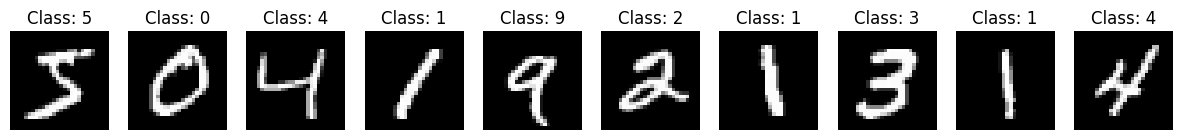

In [24]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # Create a grid of 1 row, 10 columns
for i in range(10):
    image, label = train_dataset[i]  # Extract the image and label
    axes[i].imshow(image.squeeze(), cmap='gray')  # Display the image
    axes[i].set_title(f'Class: {label}')  # Add the label as a title
    axes[i].axis('off')  # Turn off the axes

plt.show()  # Show all subplots in a single figure


In [25]:
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.dropout = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Adjust based on input size after convolutions
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.ReLU()(self.bn1(self.conv1(x)))
        x = nn.MaxPool2d(2)(x)  # Downsample
        x = nn.ReLU()(self.bn2(self.conv2(x)))
        x = nn.MaxPool2d(2)(x)  # Downsample
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(x)  # Apply dropout before fully connected layers
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x




In [29]:
start_time = time.time()

model = CNN_example().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


for epoch in range(10):
    model.train()
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):  # Corrected 'enumarate' to 'enumerate'
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)  # Removed redundant 'output = model(images)'
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{10}], Step [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

end_time = time.time()
execution_time = end_time - start_time
print(f"Time taken: {execution_time:.4f} seconds")


Epoch [1/10], Step [100/938], Loss: 0.5482
Epoch [1/10], Step [200/938], Loss: 0.1599
Epoch [1/10], Step [300/938], Loss: 0.1065
Epoch [1/10], Step [400/938], Loss: 0.0915
Epoch [1/10], Step [500/938], Loss: 0.0833
Epoch [1/10], Step [600/938], Loss: 0.0650
Epoch [1/10], Step [700/938], Loss: 0.0813
Epoch [1/10], Step [800/938], Loss: 0.0654
Epoch [1/10], Step [900/938], Loss: 0.0526
Epoch [2/10], Step [100/938], Loss: 0.0478
Epoch [2/10], Step [200/938], Loss: 0.0451
Epoch [2/10], Step [300/938], Loss: 0.0464
Epoch [2/10], Step [400/938], Loss: 0.0492
Epoch [2/10], Step [500/938], Loss: 0.0489
Epoch [2/10], Step [600/938], Loss: 0.0489
Epoch [2/10], Step [700/938], Loss: 0.0401
Epoch [2/10], Step [800/938], Loss: 0.0440
Epoch [2/10], Step [900/938], Loss: 0.0452
Epoch [3/10], Step [100/938], Loss: 0.0374
Epoch [3/10], Step [200/938], Loss: 0.0304
Epoch [3/10], Step [300/938], Loss: 0.0386
Epoch [3/10], Step [400/938], Loss: 0.0374
Epoch [3/10], Step [500/938], Loss: 0.0327
Epoch [3/10

In [30]:
model.eval()
correct=0
total=0
with torch.no_grad():
    for images, labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs=model(images)
      _,predicted=torch.max(outputs.data,1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()

    print(f'Accuracy of the network on the test images: {100 * correct / total} %')

Accuracy of the network on the test images: 99.11 %
